2025-02-26 09:08:14.819 
  command:

    streamlit run C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


### Data Cleaning Report (Jupyter Notebook)
Removed 50 duplicates
### Missing Values Handling:
- Before Cleaning: {'Row ID': 0, 'Order ID': 0, 'Order Date': 16, 'Customer Name': 0, 'Region': 0, 'Province': 0, 'Product Category': 15, 'Product Sub-Category': 0, 'Product Name': 0, 'Order Quantity': 0, 'Sales': 0, 'Discount': 0, 'Profit': 0, 'Ship Mode': 0, 'Ship Date': 0, 'Shipping Cost': 0}
- After Cleaning: {'Row ID': 0, 'Order ID': 0, 'Order Date': 16, 'Customer Name': 0, 'Region': 0, 'Province': 0, 'Product Category': 15, 'Product Sub-Category': 0, 'Product Name': 0, 'Order Quantity': 0, 'Sales': 0, 'Discount': 0, 'Profit': 0, 'Ship Mode': 0, 'Ship Date': 0, 'Shipping Cost': 0}
### Cleaned Data Preview (Jupyter Notebook)


,Row ID,Order ID,Order Date,Customer Name,Region,Province,Product Category,Product Sub-Category,Product Name,Order Quantity,Sales,Discount,Profit,Ship Mode,Ship Date,Shipping Cost
0,1,ORD75928,2024-05-22,David Garcia,East,New York,Office Supplies,Pens,Pens 778,5,1338.18,0.38,-154.22,Same Day,2017-05-07,14.86
1,2,ORD42272,2015-08-27,David Garcia,North,Florida,Office Supplies,Pens,Pens 980,7,1065.07,0.29,-191.55,Same Day,2016-10-21,28.88
2,3,ORD57764,2017-01-17,John Smith,South,Texas,Office Supplies,Pens,Pens 804,5,1733.28,0.47,-578.75,Same Day,2020-02-14,33.36
3,4,ORD51915,2018-10-09,Bob Brown,East,Arizona,Office Supplies,Binders,Binders 276,6,400.92,0.44,-93.27,Second Class,2021-05-27,23.47
4,5,ORD99641,NaT,Liam Martinez,North,California,Furniture,Chairs,Chairs 318,4,166.81,0.14,-2.78,Second Class,2023-09-20,9.26


### Total Sales by Region (Jupyter Notebook)


Region
Central     266658.49
Centralx      1791.40
Centraly      5270.54
Centralz      1407.95
East        316968.55
Easty         1373.18
North       297563.77
Northx        3058.38
Northz        2171.87
South       270094.04
West        326747.70
Westx         2778.80
Westy         2594.59
Westz         1233.91
Name: Sales, dtype: float64

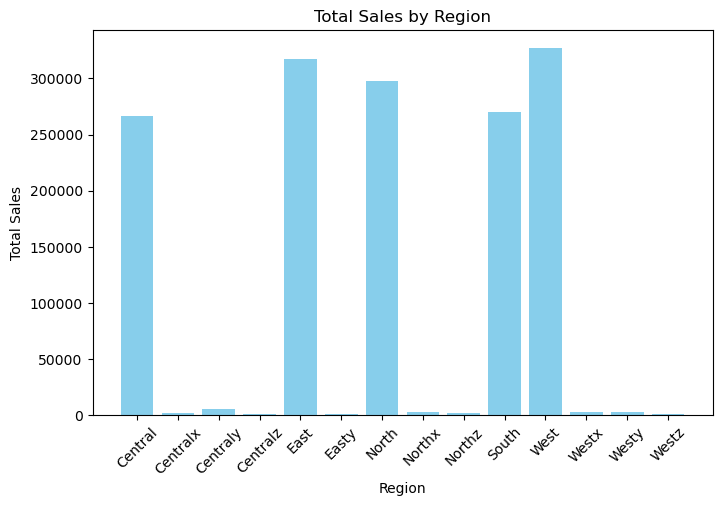

### Profit by Product Category (Jupyter Notebook)


Product Category
Furniture         -19342.89
Office Supplies   -33361.41
Technology        -17757.76
Name: Profit, dtype: float64

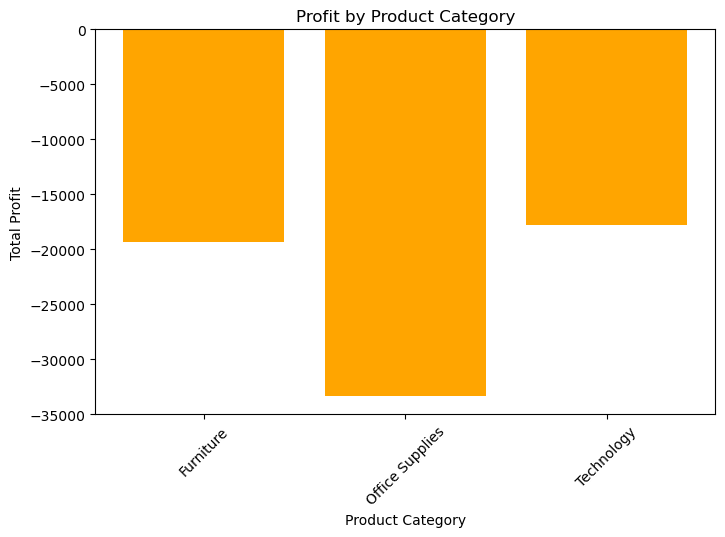

### Sales Over Time (Jupyter Notebook)


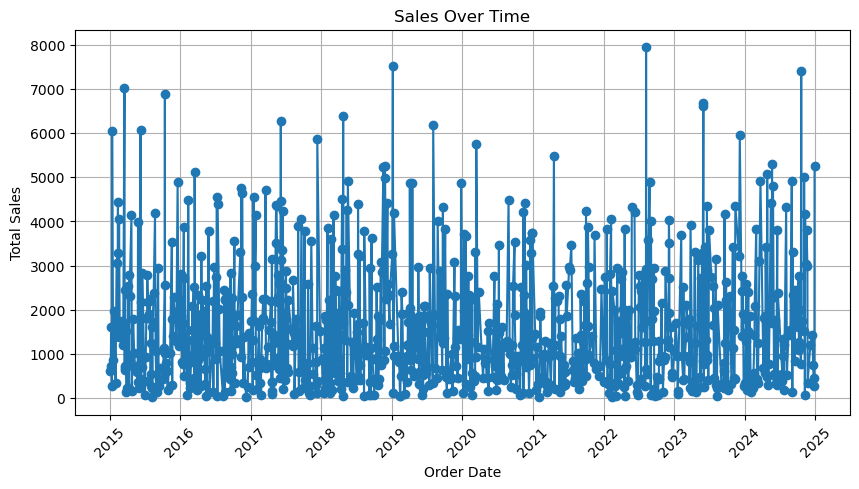

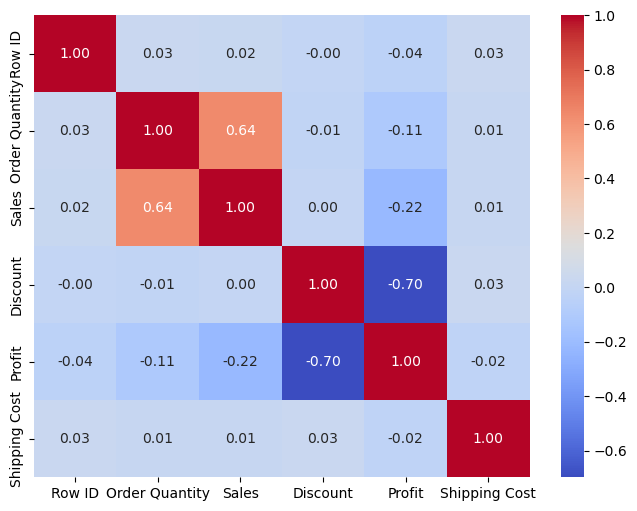

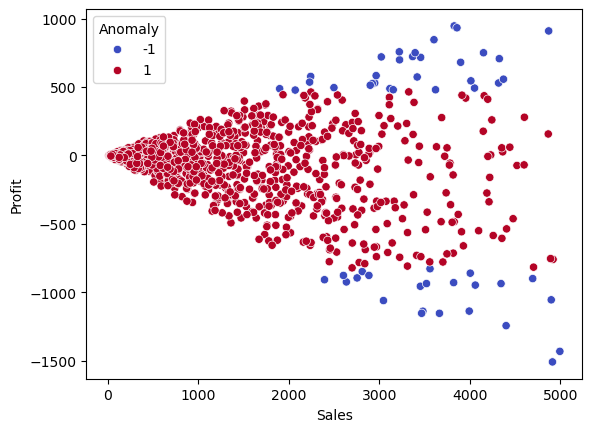

Detected 53 anomalies in profit data
Cleaned dataset saved as 'cleaned_sales_marketing_CRM.csv'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from IPython.display import display  # For Jupyter Notebook display

# ==========================
# Load and Preprocess Data
# ==========================
df = pd.read_csv('sales_marketing_CRM_fixed.csv', encoding='latin-1')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# ==========================
# Streamlit UI Setup
# ==========================
st.title('Sales and Marketing CRM Dashboard')
st.write('## Data Cleaning Report')
print("### Data Cleaning Report (Jupyter Notebook)")

# ==========================
# Data Cleaning
# ==========================
# Handle duplicates
initial_count = len(df)
df.drop_duplicates(inplace=True)
final_count = len(df)
st.write(f"Removed **{initial_count - final_count} duplicates**")
print(f"Removed {initial_count - final_count} duplicates")

# Handle missing values
missing_before = df.isnull().sum()
df.fillna({'Profit': 0, 'Sales': df['Sales'].mean()}, inplace=True)
missing_after = df.isnull().sum()

st.write(f"""
### Missing Values Handling:
- **Before Cleaning:** {missing_before.to_dict()}
- **After Cleaning:** {missing_after.to_dict()}
""")
print("### Missing Values Handling:")
print("- Before Cleaning:", missing_before.to_dict())
print("- After Cleaning:", missing_after.to_dict())

# ==========================
# Data Preview
# ==========================
st.write('### Cleaned Data Preview')
st.write(df.head())
print("### Cleaned Data Preview (Jupyter Notebook)")
display(df.head())

# ==========================
# Sales Analysis
# ==========================
st.write('## Sales Analysis')

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum()
st.write('### Total Sales by Region')
st.bar_chart(sales_by_region)
print("### Total Sales by Region (Jupyter Notebook)")
display(sales_by_region)

plt.figure(figsize=(8, 5))
plt.bar(sales_by_region.index, sales_by_region.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()

# Profit by Product Category
profit_by_category = df.groupby('Product Category')['Profit'].sum()
st.write('### Profit by Product Category')
st.bar_chart(profit_by_category)
print("### Profit by Product Category (Jupyter Notebook)")
display(profit_by_category)

plt.figure(figsize=(8, 5))
plt.bar(profit_by_category.index, profit_by_category.values, color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Profit by Product Category')
plt.xticks(rotation=45)
plt.show()

# ==========================
# Sales Over Time
# ==========================
st.write('## Sales Over Time')
sales_over_time = df.groupby('Order Date')['Sales'].sum()
st.line_chart(sales_over_time)

print("### Sales Over Time (Jupyter Notebook)")
plt.figure(figsize=(10, 5))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ==========================
# Correlation Matrix (Fixed)
# ==========================
st.write('## Correlation Matrix')
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
st.pyplot(fig)

# ==========================
# Anomaly Detection
# ==========================
st.write('## Anomaly Detection in Profit')
clf = IsolationForest(contamination=0.05)
df['Anomaly'] = clf.fit_predict(df[['Profit']])
anomalies = df[df['Anomaly'] == -1]

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Anomaly', palette='coolwarm')
st.pyplot(fig)
plt.show()

st.write(f"Detected **{len(anomalies)} anomalies** in profit data")
print(f"Detected {len(anomalies)} anomalies in profit data")

data = anomalies.to_csv(index=False).encode('utf-8')
st.download_button("Download Anomalies", data=data, file_name="anomalies.csv")

# ==========================
# Predictive Model
# ==========================
st.write('## Sales Prediction Model')
features = st.multiselect("Select features for prediction:", df.columns, default=['Discount', 'Order Quantity'])

if features:
    X = df[features]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    input_data = {feature: st.number_input(f"Enter {feature}:", value=float(df[feature].mean())) for feature in features}
    
    if st.button('Predict Sales'):
        prediction = model.predict([list(input_data.values())])
        st.write(f"Predicted Sales: **{prediction[0]:.2f}**")
        print(f"Predicted Sales: {prediction[0]:.2f}")
else:
    st.warning("Please select at least one feature for prediction.")
    print("Please select at least one feature for prediction.")

# ==========================
# Save Cleaned Data
# ==========================
df.to_csv('cleaned_sales_marketing_CRM.csv', index=False)
print("Cleaned dataset saved as 'cleaned_sales_marketing_CRM.csv'.")

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert anomaly labels to binary (1 = anomaly, 0 = normal)
y_true = (df['Anomaly'] == -1).astype(int)  # True labels: Anomalies = 1, Normal = 0
y_pred = (clf.predict(df[['Profit']]) == -1).astype(int)  # Predicted labels in binary form

# Compute classification metrics
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Display results in Streamlit
st.write("## Model Performance Metrics")
st.metric("Precision", f"{precision:.4f}")
st.metric("Recall", f"{recall:.4f}")
st.metric("F1-score", f"{f1:.4f}")

# Print in Jupyter Notebook
print("### Model Performance Metrics")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


### Model Performance Metrics
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [5]:
print(df['Anomaly'].value_counts())  # Check number of anomalies (-1) and normal points (1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Profit']], df['Anomaly'], test_size=0.2, random_state=42)
clf = IsolationForest(contamination=0.05)
clf.fit(X_train)

y_pred = clf.predict(X_test)
y_pred = (y_pred == -1).astype(int)  # Convert to binary form
y_test = (y_test == -1).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Anomaly
 1    1024
-1      53
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       201
           1       0.75      1.00      0.86        15

    accuracy                           0.98       216
   macro avg       0.88      0.99      0.92       216
weighted avg       0.98      0.98      0.98       216

